In [9]:
import tensorflow as tf

from tensorflow.keras.applications import inception_v3

pre_trained_model = tf.keras.applications.InceptionV3(
                                include_top = False, 
                                weights = 'imagenet',
                                input_shape=(150,150,3))

for layer in pre_trained_model.layers:
  layer.trainable = False


pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 74, 74, 32)   96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 74, 74, 32)   0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [10]:
modelFE = tf.keras.models.Sequential([
    pre_trained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [11]:
modelFE.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               9437696   
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 3591      
Total params: 31,244,071
Trainable params: 9,441,287
Non-trainable params: 21,802,784
_________________________________________________________________


In [12]:
import os

base_dir = "C:/Users/ferga/Documents/Python/hojas"

train_dir =      os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir =       os.path.join(base_dir, 'test')

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0/255.
)
validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))     

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=32,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))


test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         shuffle=False,
                                                         batch_size=32,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))

Found 3192 images belonging to 7 classes.
Found 399 images belonging to 7 classes.
Found 399 images belonging to 7 classes.


In [14]:
modelFE.compile(loss='categorical_crossentropy',
              optimizer= 'SGD',
              metrics=['accuracy'])

In [15]:
batch_size = 32
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

print (steps_per_epoch)
print (validation_steps)

99
12


In [16]:
history = modelFE.fit(
    train_generator, 
    steps_per_epoch= steps_per_epoch,
    epochs=10,
    validation_data=validation_generator,
    validation_steps= validation_steps,
    verbose=1)

Epoch 1/10
99/99 [==============================] - 16s 132ms/step - loss: 1.6328 - accuracy: 0.3927 - val_loss: 1.4440 - val_accuracy: 0.4427
Epoch 2/10
99/99 [==============================] - 15s 151ms/step - loss: 1.1048 - accuracy: 0.5851 - val_loss: 1.4128 - val_accuracy: 0.4271
Epoch 3/10
99/99 [==============================] - 14s 143ms/step - loss: 0.8561 - accuracy: 0.7057 - val_loss: 1.3279 - val_accuracy: 0.4401
Epoch 4/10
99/99 [==============================] - 13s 134ms/step - loss: 0.6604 - accuracy: 0.7965 - val_loss: 1.3232 - val_accuracy: 0.4688
Epoch 5/10
99/99 [==============================] - 14s 144ms/step - loss: 0.5036 - accuracy: 0.8706 - val_loss: 1.3320 - val_accuracy: 0.5286
Epoch 6/10
99/99 [==============================] - 16s 158ms/step - loss: 0.3746 - accuracy: 0.9168 - val_loss: 1.4109 - val_accuracy: 0.4896
Epoch 7/10
99/99 [==============================] - 18s 183ms/step - loss: 0.2812 - accuracy: 0.9627 - val_loss: 1.3821 - val_accuracy: 0.5312

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 432x288 with 0 Axes>

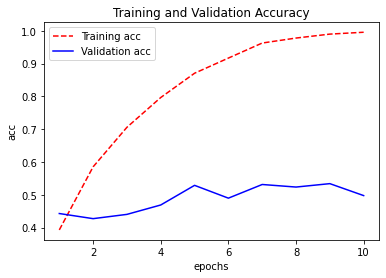

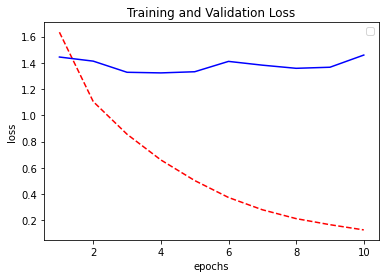

<Figure size 432x288 with 0 Axes>

In [17]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs    = range(1,len(acc)+1,1) # obtener número de epochs del eje X

plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and Validation Accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()


plt.plot  ( epochs,     loss, 'r--' )
plt.plot  ( epochs, val_loss ,  'b' )
plt.title ('Training and Validation Loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()

In [18]:
test_lost, test_acc= modelFE.evaluate(test_generator)
print ("Test Accuracy:", test_acc)

13/13 [==============================] - 3s 218ms/step - loss: 1.5225 - accuracy: 0.4637
Test Accuracy: 0.4636591374874115


In [19]:
# Salvar el modelo
modelFE.save('Contador_de_hojas_vtg.h5')

Confusion Matrix


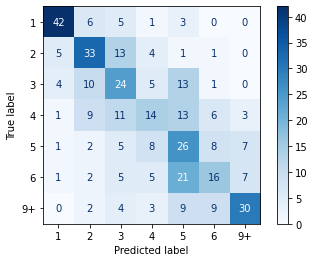

Classification Report
              precision    recall  f1-score   support

           1       0.78      0.74      0.76        57
           2       0.52      0.58      0.55        57
           3       0.36      0.42      0.39        57
           4       0.35      0.25      0.29        57
           5       0.30      0.46      0.36        57
           6       0.39      0.28      0.33        57
          9+       0.64      0.53      0.58        57

    accuracy                           0.46       399
   macro avg       0.48      0.46      0.46       399
weighted avg       0.48      0.46      0.46       399



In [20]:
# Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
train_generator.reset()
Y_pred = modelFE.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
target_names = ['1', '2','3','4','5','6','9+']
print('Confusion Matrix')
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=target_names))